## San Francisco Restaurant Reviews Machine Learning Stage
### Darren Lyles

<p>
    In this notebook, I will be ####explain later
</p>

In [104]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [5]:
df_restaurant_reviews = pd.read_csv('restaurant_reviews_tokenized.csv')
df_restaurant_reviews.head()

,Unnamed: 0,name,cuisine,address,locality,region,hours,email,tel,fax,...,latitude,longitude,price,rating,review_url,review_title,review_text,review_rating,review_date,tokenized_review_text
0,0,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Great drinks and food,They have great local craft beers and probably...,4,"Mar 28, 2016 12:00:00 AM","['great', 'local', 'craft', 'beer', 'probably'..."
1,1,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Good food &amp; beer,We went to the downtown SF location. The resta...,4,"Mar 27, 2016 12:00:00 AM","['went', 'downtown', 'sf', 'location', 'restau..."
2,2,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Pretty good beers,I just came to this place for drinks with an o...,4,"Mar 16, 2016 12:00:00 AM","['came', 'place', 'drink', 'old', 'colleague',..."
3,3,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Ridiculously overpriced (yes I live in SF),"Mediocre food (not bad, just mediocre, you can...",3,"Mar 8, 2016 12:00:00 AM","['mediocre', 'food', 'bad', 'mediocre', 'find'..."
4,4,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Team dinner,We headed out for our team dinner to this esta...,4,"Mar 1, 2016 12:00:00 AM","['headed', 'team', 'dinner', 'establishment', ..."


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split

review_x = df_restaurant_reviews['tokenized_review_text']
review_y = df_restaurant_reviews['review_rating']

cv = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(review_x, review_y, test_size=0.2, train_size=0.8, random_state=42)

cv_model = cv.fit_transform(X_train, y_train)

In [37]:
cv_array = cv_model.toarray()

In [66]:
len(cv.get_feature_names())

18386

In [48]:
len(cv_array)

13200

In [46]:
cv_array[0]
cv.inverse_transform(cv_array[0])

[array(['appetizer', 'big', 'chowder', 'clam', 'combination', 'eat',
        'good', 'little', 'mussel', 'pepper', 'place', 'seafood',
        'seasoned', 'shrimp', 'son', 'steak', 'three', 'type'],
       dtype='<U25')]

In [49]:
X_train.iloc[0]

"['mussel', 'appetizer', 'big', 'good', 'clam', 'chowder', 'good', 'shrimp', 'combination', 'three', 'type', 'shrimp', 'good', 'son', 'steak', 'good', 'little', 'seasoned', 'pepper', 'good', 'place', 'seafood', 'eat']"

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(min_df=1, stop_words='english')
tfidf_model = tfidf_v.fit_transform(X_train, y_train)

In [68]:
tfidf_array = tfidf_model.toarray()

In [69]:
len(tfidf_v.get_feature_names())

18102

In [72]:
tfidf_array[0]
tfidf_v.inverse_transform(tfidf_array[0])

[array(['appetizer', 'big', 'chowder', 'clam', 'combination', 'eat',
        'good', 'little', 'mussel', 'pepper', 'place', 'seafood',
        'seasoned', 'shrimp', 'son', 'steak', 'type'], dtype='<U25')]

<p>
    Here I will test three classificatio models: Support Vector Macine, K-Nearest Neighbors, and Naive Bayes
</p>

In [81]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###SVM Classifier Function Defintion
def svm_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
    classifier = LinearSVC()
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    print("SVC Accuracy: {}".format(accuracy_score(y_test, prediction)))
    return (y_test, prediction)

###K-Nearest Neighbors Classifier Function Definition
def knn_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    print("kNN Accuracy: {}".format(accuracy_score(y_test, prediction)))
    return (y_test, prediction)
    
###Naive Bayes Classifier Function Defintion
def nb_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    print("Naive Bayes Accuracy: {}".format(accuracy_score(y_test, prediction)))
    return (y_test, prediction)

In [121]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [110]:
count_vec = CountVectorizer(ngram_range = (1, 2))
review_x_cv = count_vec.fit_transform(review_x)

svc_actual, svc_predicted = svm_classifier(review_x_cv, review_y)
knn_actual, knn_predicted = knn_classifier(review_x_cv, review_y)
nb_actual, nb_predicted   = nb_classifier(review_x_cv, review_y)

SVC Accuracy: 0.6951515151515152
kNN Accuracy: 0.47878787878787876
Naive Bayes Accuracy: 0.6751515151515152


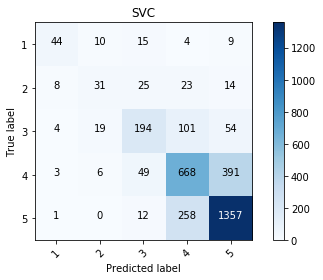

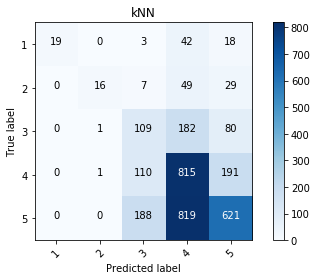

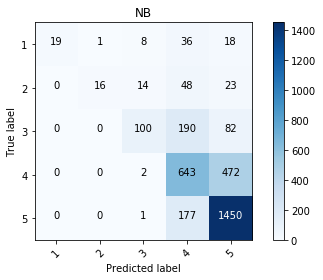

In [122]:
from sklearn.metrics import classification_report, confusion_matrix

class_names = ['1', '2', '3', '4', '5']
plot_confusion_matrix(confusion_matrix(svc_actual, svc_predicted), classes=class_names, title='SVC')
plt.figure()
plot_confusion_matrix(confusion_matrix(knn_actual, knn_predicted), classes=class_names, title='kNN')
plt.figure()
plot_confusion_matrix(confusion_matrix(nb_actual, nb_predicted), classes=class_names, title='NB')

In [123]:
tfidf_vec = TfidfVectorizer(ngram_range = (1, 2))
review_x_tfidf = tfidf_vec.fit_transform(review_x)

svc_actual, svc_predicted = svm_classifier(review_x_tfidf, review_y)
knn_actual, knn_predicted = knn_classifier(review_x_tfidf, review_y)
nb_actual, nb_predicted   = nb_classifier(review_x_tfidf, review_y)

SVC Accuracy: 0.703030303030303
kNN Accuracy: 0.59
Naive Bayes Accuracy: 0.5609090909090909


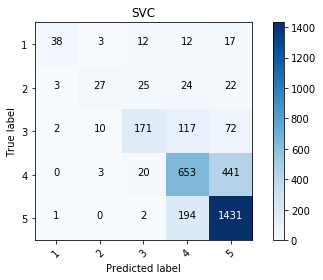

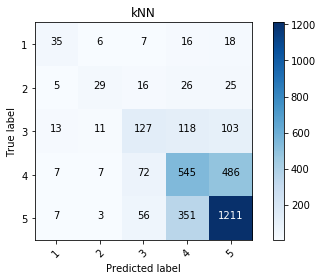

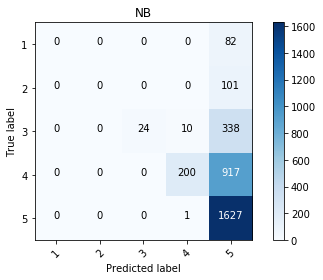

In [124]:
plot_confusion_matrix(confusion_matrix(svc_actual, svc_predicted), classes=class_names, title='SVC')
plt.figure()
plot_confusion_matrix(confusion_matrix(knn_actual, knn_predicted), classes=class_names, title='kNN')
plt.figure()
plot_confusion_matrix(confusion_matrix(nb_actual, nb_predicted), classes=class_names, title='NB')

<p>
    SVC with TF-IDF is the winner!!!
</p>

In [170]:
review_x_tfidf_array = review_x_tfidf.toarray()

In [175]:
review_x_tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [176]:
classifier = LinearSVC()
classifier.fit(review_x_tfidf, review_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [195]:
tfidf_vec.inverse_transform(review_x_tfidf[2])

[array(['beer', 'good', 'place', 'drink', 'nice', 'came', 'old',
        'colleague', 'pretty', 'service', 'nothing', 'spectacular', 'go',
        'back', 'came place', 'place drink', 'drink old', 'old colleague',
        'colleague beer', 'beer pretty', 'pretty good', 'good service',
        'service nice', 'nice nothing', 'nothing spectacular',
        'spectacular go', 'go back'], dtype='<U35')]

In [202]:
classifier.predict(review_x_tfidf)

array([4, 4, 4, ..., 5, 4, 3])

In [217]:
classifier.predict(tfidf_vec.transform(['This restaurant was absolutely amazing!!!']))

array([5])

In [218]:
classifier.predict(tfidf_vec.transform(['This restaurant was OK i guess.']))

array([3])

In [249]:
classifier.predict(tfidf_vec.transform(['This place is the worst.']))

array([1])